In [1]:
from mylibs.dataloader_dict import *
from mylibs.trainer import *
import torch
import torch.nn as nn
import os
import torch.utils.data as data
from importlib import import_module
import matplotlib.pyplot as plt
import torch.optim as optim
import copy

vggish_input=import_module(".torchvggish.vggish_input","torchvggish-master_changed")
use_pretrained = True

#GPU
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('Using {} device'.format(device))
labels=["Speech","Music","Silence","Siren","Vehicle","Wind"]

vggish/embedding:0
vggish/embedding:0
Using cuda device


In [2]:
#これを保存した
mymodel=trainer(_print=False,_lr=1,_classfilter=nn.Sequential(
                            nn.Linear(128,64),
                            nn.Dropout(p=0.25),
                            nn.Sigmoid(),
                            nn.Linear(64,6),
                            nn.Softmax(dim=1)
                            ) )
dataloader_dict=get_dataloader_dict(labels,datatype="train")



vggish/embedding:0
C:\Users\hase\git\MyVggishLearning\mylibs\dataloaders ['C:\\Users\\hase\\git\\MyVggishLearning\\mylibs\\dataloaders\\evalMusicSilenceSirenSpeechVehicleWind.jb', 'C:\\Users\\hase\\git\\MyVggishLearning\\mylibs\\dataloaders\\trainMusic100Speech100.jb', 'C:\\Users\\hase\\git\\MyVggishLearning\\mylibs\\dataloaders\\trainMusic10Speech10.jb', 'C:\\Users\\hase\\git\\MyVggishLearning\\mylibs\\dataloaders\\trainMusicSilenceSirenSpeechVehicle.jb', 'C:\\Users\\hase\\git\\MyVggishLearning\\mylibs\\dataloaders\\trainMusicSilenceSirenSpeechVehicleWind.jb', 'C:\\Users\\hase\\git\\MyVggishLearning\\mylibs\\dataloaders\\trainMusicSirenSpeechVehicle.jb', 'C:\\Users\\hase\\git\\MyVggishLearning\\mylibs\\dataloaders\\trainMusicSpeech.jb']
joblib.loadします
train用データの数：674
valid用データの数：347


Epoch 1/50
train Loss: 1.753937 Acc: 0.241830
valid Loss: 1.720516 Acc: 0.379469
Epoch 2/50
train Loss: 1.713514 Acc: 0.452020
valid Loss: 1.689282 Acc: 0.512111
Epoch 3/50
train Loss: 1.695496 Acc: 0.520945
valid Loss: 1.671822 Acc: 0.559400
Epoch 4/50
train Loss: 1.684939 Acc: 0.555258
valid Loss: 1.660507 Acc: 0.586505
Epoch 5/50
train Loss: 1.678200 Acc: 0.580660
valid Loss: 1.652161 Acc: 0.598616
Epoch 6/50
train Loss: 1.673359 Acc: 0.591949
valid Loss: 1.645626 Acc: 0.606113
Epoch 7/50
train Loss: 1.668520 Acc: 0.596851
valid Loss: 1.640206 Acc: 0.608997
Epoch 8/50
train Loss: 1.665378 Acc: 0.602347
valid Loss: 1.635696 Acc: 0.610727
Epoch 9/50
train Loss: 1.662282 Acc: 0.614379
valid Loss: 1.631688 Acc: 0.642445
Epoch 10/50
train Loss: 1.660094 Acc: 0.627897
valid Loss: 1.628186 Acc: 0.643599
Epoch 11/50
train Loss: 1.657495 Acc: 0.632799
valid Loss: 1.624918 Acc: 0.647059
Epoch 12/50
train Loss: 1.655244 Acc: 0.635918
valid Loss: 1.622117 Acc: 0.649366
Epoch 13/50
train Loss: 1

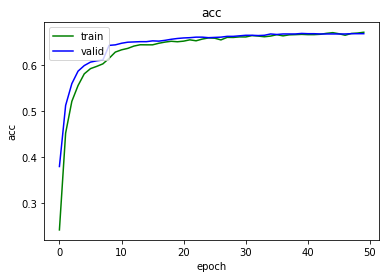

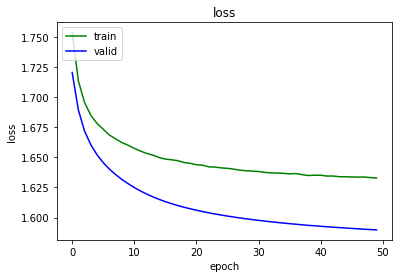

In [3]:
mymodel.train(dataloader_dict,_print=True,_num_epochs=50)
mymodel.graph()

In [4]:
#hozon
import joblib
joblib.dump(mymodel,"tyuukannyou.jb", compress=3)

['tyuukannyou.jb']

In [5]:
#よみこみ
import joblib
dataloader_dict=joblib.load("tyuukannyou.jb")

In [5]:

dataloader_dict=get_dataloader_dict(labels,datatype="eval")
def eval(tr,dataloader_dict,labels):
    model=tr.model
    inputs,la = iter(dataloader_dict["train"]).__next__()
    model.eval()

    output = model(inputs)
    for h in range(len(output)):
        print("模範解答",labels[la[h].item()])
        ans=[[labels[i],output[h][i].item()] for i in range(len(labels))]
        ans.sort(key=lambda x: x[1],reverse=True)
        [print("{:7}:{:.5f}".format(ans[i][0],ans[i][1])) for i in range(len(ans))]
        print("----------------")

def eval2(tr,dataloader_dict,labels):
    model=tr.model
    acc=0
    count=0.0
    for inputs,la in dataloader_dict["train"]:

        model.eval()

        output = model(inputs)
        for h in range(len(output)):
            #print("模範解答",labels[la[h].item()])
            ans=[[i,output[h][i].item()] for i in range(len(labels))]
            ans.sort(key=lambda x: x[1],reverse=True)
            acc+=1 if (ans[0][0]==la[h])else 0
            count+=1
            #[print("{:7}:{:.5f}".format(ans[i][0],ans[i][1])) for i in range(len(ans))]
            #print("----------------")
    print("正解数/入力数:{}/{:.0f}".format(acc,count))
    print("正解率:{:.3f}".format(acc/count))
#eval(mymodel,dataloader_dict,labels)        
eval2(mymodel,dataloader_dict,labels)


C:\Users\hase\git\MyVggishLearning\mylibs\dataloaders ['C:\\Users\\hase\\git\\MyVggishLearning\\mylibs\\dataloaders\\evalMusicSilenceSirenSpeechVehicleWind.jb', 'C:\\Users\\hase\\git\\MyVggishLearning\\mylibs\\dataloaders\\trainMusic100Speech100.jb', 'C:\\Users\\hase\\git\\MyVggishLearning\\mylibs\\dataloaders\\trainMusic10Speech10.jb', 'C:\\Users\\hase\\git\\MyVggishLearning\\mylibs\\dataloaders\\trainMusicSilenceSirenSpeechVehicle.jb', 'C:\\Users\\hase\\git\\MyVggishLearning\\mylibs\\dataloaders\\trainMusicSilenceSirenSpeechVehicleWind.jb', 'C:\\Users\\hase\\git\\MyVggishLearning\\mylibs\\dataloaders\\trainMusicSirenSpeechVehicle.jb', 'C:\\Users\\hase\\git\\MyVggishLearning\\mylibs\\dataloaders\\trainMusicSpeech.jb']
joblib.loadします
train用データの数：75
valid用データの数：42
正解数/入力数:473/743
正解率:0.637


In [6]:
eval(mymodel,dataloader_dict,labels)

模範解答 Speech
Speech :0.52110
Siren  :0.13776
Music  :0.10858
Wind   :0.08708
Vehicle:0.08445
Silence:0.06103
----------------
模範解答 Wind
Siren  :0.29005
Wind   :0.28584
Vehicle:0.17389
Speech :0.13511
Silence:0.06387
Music  :0.05124
----------------
模範解答 Siren
Siren  :0.54936
Music  :0.12463
Speech :0.11021
Wind   :0.07641
Vehicle:0.07503
Silence:0.06436
----------------
模範解答 Speech
Speech :0.37006
Music  :0.20474
Siren  :0.19471
Vehicle:0.09380
Wind   :0.08514
Silence:0.05155
----------------
模範解答 Wind
Wind   :0.43472
Siren  :0.17116
Vehicle:0.14075
Speech :0.11503
Silence:0.07183
Music  :0.06651
----------------
模範解答 Siren
Siren  :0.66297
Speech :0.09607
Music  :0.06883
Vehicle:0.06542
Silence:0.05871
Wind   :0.04799
----------------
模範解答 Vehicle
Siren  :0.23752
Vehicle:0.22960
Speech :0.20765
Wind   :0.17584
Silence:0.07702
Music  :0.07237
----------------
模範解答 Music
Wind   :0.37418
Speech :0.20102
Siren  :0.15105
Vehicle:0.13385
Silence:0.07698
Music  :0.06292
----------------
模範解答 V